In [1]:
import textwrap

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This notebook explores the 2024 my health my survey from https://datamillnorth.org/dataset/emd7m/my-health-my-school-survey. The notebook is broken down into the following sections:

1. Loading the Data - covers loading the data and working with multiindex columns which can be tricky.
2. Explore the text data in the columns - presents some ways to extract themes and topics from the very long columns names.
3. Explore Eating Habbits - Explores data on students' eating habbits in some detail.
4. Quick Starting Points - Briefly covers a few starting points that can be explored further.

We encourage you to find things in the data that you want to explore.

## 1. Loading the Data

In this notebook, we will only look at the 2024 data. Loading the data is not straight forward since the header of the CSV file is contained within the first two rows not just the first row. This means we have to work with Pandas' multiindex object which can be tricky.

Load the data ensuring the first two rows are treated as headers and `low_memory=False` to help ensure the correct data types are inferred.

In [7]:
path = r"C:\Users\Guest01\Documents\DS_Work_Experience_2025-main\datasets\MHMS 20230901 - 20240831.csv"
df = pd.read_csv(path, header=[0, 1], low_memory=False)

# Display the first 5 rows and first 5 columns
df.iloc[:5, :5]

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0
,hashed_id,school_classification_list,school_local_authority_filter_classification,questionnaire_login_year_group_name,What is your gender?
0,'60c9',Primary,Leeds,Year 4,Boy / Male
1,'65c90',Primary,Leeds,Year 4,Boy / Male
2,'b530a',Primary,Leeds,Year 4,Girl / Female
3,'b7e74',Primary,Leeds,Year 3,Boy / Male
4,'e8a80',Primary,Leeds,Year 4,Girl / Female


In [9]:
df.columns

MultiIndex([(  'Unnamed: 0_level_0', ...),
            (  'Unnamed: 1_level_0', ...),
            (  'Unnamed: 2_level_0', ...),
            (  'Unnamed: 3_level_0', ...),
            (  'Unnamed: 4_level_0', ...),
            (  'Unnamed: 5_level_0', ...),
            (  'Unnamed: 6_level_0', ...),
            (  'Unnamed: 7_level_0', ...),
            (  'Unnamed: 8_level_0', ...),
            (  'Unnamed: 9_level_0', ...),
            ...
            ('Unnamed: 988_level_0', ...),
            ('Unnamed: 989_level_0', ...),
            ('Unnamed: 990_level_0', ...),
            ('Unnamed: 991_level_0', ...),
            ('Unnamed: 992_level_0', ...),
            ('Unnamed: 993_level_0', ...),
            ('Unnamed: 994_level_0', ...),
            ('Unnamed: 995_level_0', ...),
            ('Unnamed: 996_level_0', ...),
            ('Unnamed: 997_level_0', ...)],
           names=['header_1', 'header_2'], length=998)

The second row of the header has been parsed correctly, the first row has not. All values in the first header row start with `Unnamed` which is Pandas' default behaviour when it encounters empty column names. For simplicity, I will now refer to the first row of the header as `header_1` and the second row as `header_2`.

Assign the name `header_1` and `header_2` to each level of the header. This is purely to make our code more readable.

In [9]:
df.columns.names = ["header_1", "header_2"]

The values in `header_1` and `header_2` can be accessed using the `get_level_values` method.

In [10]:
print(df.columns.get_level_values("header_1").tolist()[:5])
print(df.columns.get_level_values("header_2").tolist()[:5])

['Unnamed: 0_level_0', 'Unnamed: 1_level_0', 'Unnamed: 2_level_0', 'Unnamed: 3_level_0', 'Unnamed: 4_level_0']
['hashed_id', 'school_classification_list', 'school_local_authority_filter_classification', 'questionnaire_login_year_group_name', 'What is your gender?']


Find the names in `header_1` that do not start with `Unnamed`.

In [11]:
header_1 = df.columns.get_level_values("header_1")
print(type(header_1))
# Display the first 10 names in header_1 that do not start with 'Unnamed'
header_1[~header_1.str.startswith("Unnamed")][:10]

<class 'pandas.core.indexes.base.Index'>


Index(['In a normal school/college week, how many days do you have the following (this means not just a snack or a drink)?',
       'On a normal school/college day, how many portions of the following do you have?',
       'How much do you agree or disagree with the following statements?',
       'How often do you feel the following?',
       'How well do you think you cope with feeling the following?',
       'If you have been bullied in or around school/college in the last 12 months, do you think it was because of any of the following?',
       'Why do you feel unsafe at home?',
       'Do you help to look after somebody in your family because they?',
       'Over the last 12 months have you worried about any of the following?',
       'What helps you feel better when you are worried, sad, angry or lonely?'],
      dtype='object', name='header_1')

It appears that the none missing values in `header_1` should be applied to all columns to the right until the next none missing value. For example, display the columns 16 through 26.

It appears that values in `header_1` that do not start with `Unnamed` should be applied to all columns to the right until the next value that does not start with `Unnamed`. This can be seen more clearly by looking at columns 16 through 26.

In [ ]:
df

In [10]:
df.iloc[:5, 19:26]

header_1,"On a normal school/college day, how many portions of the following do you have?",Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0
header_2,High energy drinks,Snacks that are high in fat or high in sugar,"Unsweetened drinks (e.g. milk, water)",Sugar Sweetened drinks,Fruit and Vegetables,How often do you brush your teeth?,How often do you visit the dentist?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# REMEBR TO CHECK ASSUMPTION

The value *"On a normal day, how many portions of the following do you have?"* in `header_1` applies to the following values in `header_2`:

* *"Sweetened drinks (e.g. Pepsi, fruit juice)"*
* *"Fruit & vegetables (can include up to one medium glass of fruit juice)"*
* *"Snacks (crisps, chocolate bar, packet of sweets, biscuits)"*
* *"Unsweetened drinks (e.g. milk, water)"*
* *"High energy drinks (e.g. Red Bull, Monster)"*

But it does not apply to *"How often do you brush your teeth?"* and *"How often do you visit the dentist"*. To avoid having to manually rename all values that start with `Unnamed: `, we will work under the that assumption values in `header_1` apply to all columns to right until the next none empty value in `header_1`. You should revisit this when you are doing your analysis to see if you can improve on this.

To replace all the missing values in `header_1`, we replace values that start with `Unnamed` with `NaN` then use the forward fill (`ffill`) to fill in the missing values.

In [12]:
new_column_names = df.columns.to_frame(index=False, name=["header_1", "header_2"]).copy()
new_column_names.loc[new_column_names["header_1"].str.startswith("Unnamed"), "header_1"] = np.nan
new_column_names.at[0, "header_1"] = "No Group"
new_column_names["header_1"] = new_column_names["header_1"].ffill()
new_column_names.head()

,header_1,header_2
0,No Group,hashed_id
1,No Group,school_classification_list
2,No Group,school_local_authority_filter_classification
3,No Group,questionnaire_login_year_group_name
4,No Group,What is your gender?


Replace the column names in the original dataframe with the new column names.

In [13]:
df.columns = pd.MultiIndex.from_frame(new_column_names)
df.iloc[:5, :5]

header_1  No Group                             \
header_2 hashed_id school_classification_list   
0           '60c9'                    Primary   
1          '65c90'                    Primary   
2          'b530a'                    Primary   
3          'b7e74'                    Primary   
4          'e8a80'                    Primary   

header_1                                               \
header_2 school_local_authority_filter_classification   
0                                               Leeds   
1                                               Leeds   
2                                               Leeds   
3                                               Leeds   
4                                               Leeds   

header_1                                                           
header_2 questionnaire_login_year_group_name What is your gender?  
0                                     Year 4           Boy / Male  
1                                     Year 4           Boy / Male  
2                                     Year 4        Girl / Female  
3                                     Year 3           Boy / Male  
4                                     Year 4        Girl / Female

All of the work has put the dataframe in a form that is easier to work with in pandas. For example, we can now use the `xs` method to get all columns related to a particular value in `header_1`.

Use `xs` to get all the columns with `No Group` in `header_1`.

In [14]:
df.xs("No Group", axis=1, level="header_1").head()

header_2,hashed_id,school_classification_list,school_local_authority_filter_classification,questionnaire_login_year_group_name,What is your gender?,Is your gender identity the same gender you were assigned at birth?,How would you describe your sexual identity?,Which of these describes you?,Do you consider yourself to be disabled?,"If you said yes, you consider yourself to be disabled, what is the nature of your impairment?",Where do you live most of the time?,Do you have a free school meal?,Which of these describes you as a student?,Are you a...,DELETE - I would describe my gender in some other way,"In a normal school/college week, how many days do you have breakfast?","On a normal school/college day, where do you eat breakfast?"
0,'60c9',Primary,Leeds,Year 4,Boy / Male,NaN,NaN,White,No,NaN,I live with my parent(s)/carer(s),"Yes, I have a free school meal",NaN,NaN,NaN,NaN,NaN
1,'65c90',Primary,Leeds,Year 4,Boy / Male,NaN,NaN,White,No,NaN,I live with my parent(s)/carer(s),I don't know,NaN,NaN,NaN,NaN,NaN
2,'b530a',Primary,Leeds,Year 4,Girl / Female,NaN,NaN,White,No,NaN,I live with my parent(s)/carer(s),"Yes, I have a free school meal",NaN,NaN,NaN,NaN,NaN
3,'b7e74',Primary,Leeds,Year 3,Boy / Male,NaN,NaN,White,No,NaN,I live with my parent(s)/carer(s),"Yes, I have a free school meal",NaN,NaN,NaN,NaN,NaN
4,'e8a80',Primary,Leeds,Year 4,Girl / Female,NaN,NaN,White,No,NaN,I live with my parent(s)/carer(s),"Yes, I have a free school meal",NaN,NaN,NaN,NaN,NaN


This can also be done with a for loop.

In [15]:
columns = [col for col in df.columns if col[0] == "No Group"]
df[columns].head()

header_1  No Group                             \
header_2 hashed_id school_classification_list   
0           '60c9'                    Primary   
1          '65c90'                    Primary   
2          'b530a'                    Primary   
3          'b7e74'                    Primary   
4          'e8a80'                    Primary   

header_1                                               \
header_2 school_local_authority_filter_classification   
0                                               Leeds   
1                                               Leeds   
2                                               Leeds   
3                                               Leeds   
4                                               Leeds   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
0                                     Year 4           Boy / Male   
1                                     Year 4           Boy / Male   
2                                     Year 4        Girl / Female   
3                                     Year 3           Boy / Male   
4                                     Year 4        Girl / Female   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
0                                                       NaN                     
1                                                       NaN                     
2                                                       NaN                     
3                                                       NaN                     
4                                                       NaN                     

header_1                                               \
header_2 How would you describe your sexual identity?   
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   

header_1                                \
header_2 Which of these describes you?   
0                                White   
1                                White   
2                                White   
3                                White   
4                                White   

header_1                                           \
header_2 Do you consider yourself to be disabled?   
0                                              No   
1                                              No   
2                                              No   
3                                              No   
4                                              No   

header_1                                                                                                \
header_2 If you said yes, you consider yourself to be disabled, what is the nature of your impairment?   
0                                                       NaN                                              
1                                                       NaN                                              
2                                                       NaN                                              
3                                                       NaN                                              
4                                                       NaN                                              

header_1                                                                      \
header_2 Where do you live most of the time? Do you have a free school meal?   
0          I live with my parent(s)/carer(s)  Yes, I have a free school meal   
1          I live with my parent(s)/carer(s)                    I don't know   
2          I live with my parent(s)/carer(s)  Yes, I have a free school me

Find the most common values in `header_1`. This will tell us the values in `header_1` that cover the largest number of columns.

In [14]:
header_1_frequency = (
    df.columns
    .get_level_values("header_1")
    .value_counts()
    .reset_index()
)
header_1_frequency.head()

,header_1,count
0,How good do you think your school/college are ...,50
1,"To make sure you are safe and healthy, would y...",48
2,"Today, what are you worrying about most?",45
3,How much useful information and learning have ...,45
4,"If you felt worried during lockdown, what did ...",44


Print the entire string of the most common value in `header_1`.

In [15]:
type(header_1_frequency)

pandas.core.frame.DataFrame

In [16]:
header_1_frequency.at[0, "header_1"]

'How good do you think your school/college are at dealing with the following?'

This covers **50** columns. Find some of the columns that are covered by this value in `header_1`.

In [17]:
header_1_com = 'How good do you think your school/college are at dealing with the following?'
df.xs(key=header_1_com, axis=1, level="header_1").iloc[:5, :5]

header_2,Racism,People from different backgrounds not getting on well,Biphobic bullying,Transphobic bullying,Pupils/students sharing nude pictures or videos
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [18]:
header_1_name = "How much useful information and learning have you had to help you understand the following things? (e.g. through lessons at school/college)"
selected_columns = [col for col in df.columns if col[0] == header_1_name]

# Display the first 5 rows and first 5 columns
df[selected_columns].iloc[:5, :5]

header_1 How much useful information and learning have you had to help you understand the following things? (e.g. through lessons at school/college)  \
header_2                                                                                                                            Risks of alcohol   
0                                                       NaN                                                                                            
1                                                       NaN                                                                                            
2                                                       NaN                                                                                            
3                                                       NaN                                                                                            
4                                                       NaN                                                                                            

header_1                                                                    \
header_2 Experiences of the world of work Risks of air pollution on health   
0                                     NaN                              NaN   
1                                     NaN                              NaN   
2                                     NaN                              NaN   
3                                     NaN                              NaN   
4                                     NaN                              NaN   

header_1                                    
header_2 Climate change Financial Security  
0                   NaN                NaN  
1                   NaN                NaN  
2                   NaN                NaN  
3                   NaN                NaN  
4                   NaN                NaN

In [16]:
years = df.xs(key="questionnaire_login_year_group_name", axis=1, level="header_2")

In [17]:
years_counts = years.value_counts().reset_index()
total = years_counts['count'].sum()
years_counts["%"] = years_counts["count"] / total * 100
years_counts

,No Group,count,%
0,Year 6,8270,20.051888
1,Year 5,7601,18.429794
2,Year 9,6058,14.688553
3,Year 7,5292,12.831268
4,Year 4,3511,8.512960
5,Year 3,3140,7.613413
6,Year 8,1922,4.660185
7,Year 11,1868,4.529253
8,Year 10,1670,4.049172
9,Year 12,1092,2.647722


In [18]:
import plotly.express as px
fig = px.bar(years_counts, "count", "No Group")#, "count")
fig.show()

In [112]:
with open("quesitons1.txt", "x") as f:
    for i in df.columns:
        f.write(str(i[1])
        f.write("\n")
        f.write(i[0])
        f.write("\n")

## 2. Exploring the text in the column headers

In the previous section we saw that the values in `header_1` and `header_2` can be very long making it very difficult to find common themes across the columns. In this section, we will explore the text in the headers and introduce some techniques for finding frequent words.

Extract some basic statistics from `header_1` and `header_2`.

In [19]:
print(f"Number of unique values in header_1: {df.columns.get_level_values('header_1').nunique()}")
print(f"Number of unique values in header_2: {df.columns.get_level_values('header_2').nunique()}")
print(f"Number of columns: {df.shape[1]}")

Number of unique values in header_1: 60
Number of unique values in header_2: 753
Number of columns: 998


We want to find frequent words in these headers which should indicate themes these in the dataset. A nice way to visualise this is with a word cloud; the larger the word, the more common it is.

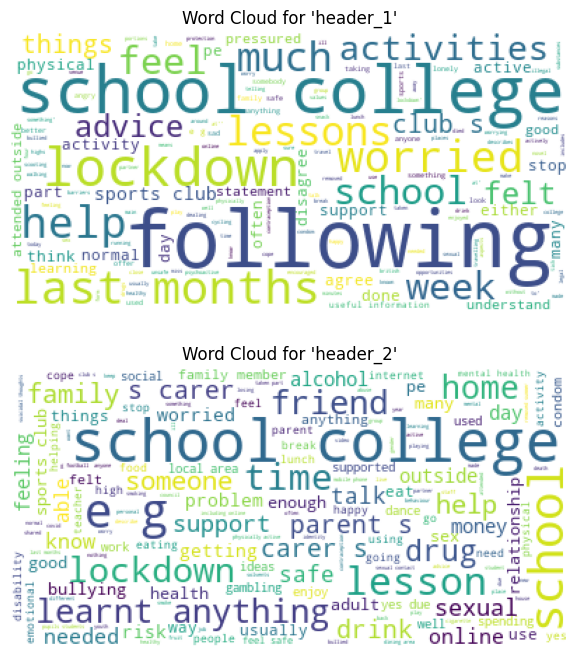

In [20]:
from wordcloud import WordCloud

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

for i, header in enumerate(["header_1", "header_2"]):
    names = df.columns.get_level_values(header).unique()
    text = " ".join(names).lower()
    
    word_cloud = WordCloud(background_color="white")
    word_cloud.generate(text)

    ax[i].imshow(word_cloud)
    ax[i].axis("off")
    ax[i].set_title(f"Word Cloud for '{header}'")

Some themes that jump out to me:

* Lockdown
* Sports/healthy eating
* Money
* Mental health and pressure.

There are are some word that do not tell us much. For example, the letters `e` and `g` are common but that is probably from the shorthand `e.g.`. Can these word clounds be improved by removing some of these uninteresting words?

Now let us find the columns that contain the word lockdown in `header_2`.

In [28]:
selected_columns = [col for col in df.columns if "lockdown" in col[1].lower()]

# Display the first 5 rows and first 8 columns
df[selected_columns].iloc[500:505, :5]

header_1     Today, what are you worrying about most?  \
header_2 How has the lockdown affected your feelings?   
500                                               NaN   
501                                               NaN   
502                                               NaN   
503                                               NaN   
504                                               NaN   

header_1 What things made you feel better when you were worried during lockdown?  \
header_2                            I did not use anything to cope with lockdown   
500                                                     NaN                        
501                                                     NaN                        
502                                                     NaN                        
503                                                     NaN                        
504                                                     NaN                        

header_1                          \
header_2 During lockdown, I was:   
500                          NaN   
501                          NaN   
502                          NaN   
503                          NaN   
504                          NaN   

header_1                                                       During lockdown . . .  \
header_2 During lockdown, my experience of bullying (including online bullying) was'   
500                                                     NaN                            
501                                                     NaN                            
502                                                     NaN                            
503                                                     NaN                            
504                                                     NaN                            

header_1                                                       During lockdown'  
header_2 During lockdown, which of the following statements describes you . . .  
500                                                     NaN                      
501                                                     NaN                      
502                                                     NaN                      
503                                                     NaN                      
504                                                     NaN

The table above contains data on feelings and experiences during lockdown. Note that in `header_1`, the values `During lockdown. . .` and `During lockdown'` should perhaps be treated the same. You should explore to see if there are other values `header_1` or `header_2` that have the same problem. There is also a lot of missing data in the table above, you should see if there is any data for these columns.

# 3. Exploring Eating Habbits

In the previous section, we saw some techniques to find and extract common themes from the data. In this section we are going to dive a little deeper into the students' eating habbits. We start by looking at *"In a normal week, how often do you have the following (this means not just a snack or a drink)?"* from `header_1`.

Extract data assosciated with this value.

In [29]:
header_1 = 'In a normal school/college week, how many days do you have the following (this means not just a snack or a drink)?'

selected_columns = [col for col in df.columns if col[0] == header_1]
df[selected_columns].head()

header_1 In a normal school/college week, how many days do you have the following (this means not just a snack or a drink)?  \
header_2                                                                                                Evening meal/Dinner   
0                                                       NaN                                                                   
1                                                       NaN                                                                   
2                                                       NaN                                                                   
3                                                       NaN                                                                   
4                                                       NaN                                                                   

header_1        
header_2 Lunch  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

This table contains information on the number of times the students get a proper lunch and dinner in a normal week.

Count the number of students that belong to each group.

In [41]:
df_meals = df[selected_columns]

# Drop 'header_1' to shorten to column names
df_meals.columns = df_meals.columns.droplevel("header_1")
df_meals = df_meals[["Lunch", "Evening meal/Dinner"]]
df_meals
df_meals = df_meals.value_counts().reset_index(name="Count")
df_meals

,Lunch,Evening meal/Dinner,Count
0,5.0,5.0,22985
1,4.0,5.0,1612
2,3.0,5.0,1569
3,5.0,4.0,884
4,2.0,5.0,705
5,1.0,1.0,669
6,5.0,3.0,410
7,4.0,4.0,400
8,1.0,5.0,320
9,3.0,4.0,278


Most students have lunch and dinner most days in the week but there are a concerning number of students who do not.

Let us visualise this data in a heatmap. To do this, we must pivot the dataframe so its index is the `Lunch` columns and its columns are the `Evening meal/Dinner` column.

In [78]:

tmp = df_meals.loc[1:].pivot(index="Lunch", columns="Evening meal/Dinner", values="Count")
tmp

Evening meal/Dinner,1.0,2.0,3.0,4.0,5.0
Lunch,,,,,
1.0,669.0,215.0,105.0,92.0,320.0
2.0,174.0,181.0,182.0,191.0,705.0
3.0,56.0,140.0,257.0,278.0,1569.0
4.0,37.0,63.0,149.0,400.0,1612.0
5.0,74.0,170.0,410.0,884.0,NaN


Now can plot the heatmap.

Text(0.5, 1.0, 'In a Normal Week, how often do Students have Lunch or Dinner?')

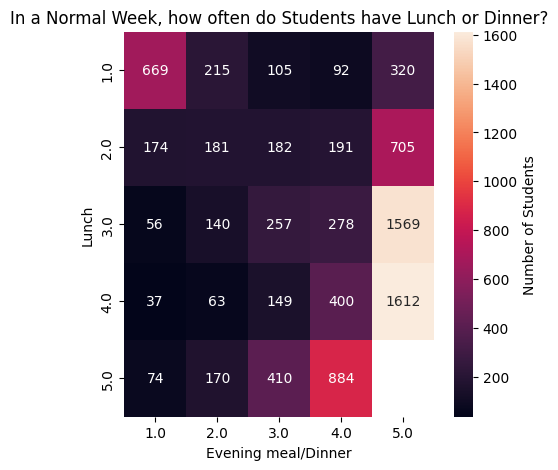

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.heatmap(
    tmp,
    annot=True,
    fmt=".0f",  # Ensure the annotations are integers
    cbar_kws={"label": "Number of Students"}
)
ax.set_title("In a Normal Week, how often do Students have Lunch or Dinner?")

Over 1000 students get a proper lunch/dinner fewer than four times per week. Assuming the students are in school 5 days per week, there may be a problem with dining at school that is preventing students from getting at least 5 proper lunches per week. We have data on the opinions of students' on school dining under the header "How much do you agree or disagree with following statements?" in `header_1`.

In [42]:
header_1 = "How much do you agree or disagree with the following statements?"
df.xs(header_1, axis=1, level="header_1").head()

header_2,My school/college encourages me to drink water regularly,My school provides foods that match my cultural needs (e.g. Halal),"At this school/college, I have enough time to eat my lunch",I enjoy eating in my school/college dining area,I can usually find a place to sit and eat my lunch in the dining area,My school provides foods that match my dietary needs (e.g. Vegan),Queuing time is short in the dining area,Pupils/students behave well in the dining area,I like the food provided by my school/college,How often do you have breakfast each week (this means not just a snack or a drink)?,...,Do you enjoy eating in the school/college dining area?,Do you like the food provided by your school/college and does it taste nice?,Does your school/college encourage you to drink water regularly?,My school/college helps me if I am worried or have a problem,There are good things to do before and after school/college,There are good things to do at break times/lunch times,I enjoy going to school/college,My school/college is a caring place,There are staff in my school/college that I trust,I feel like I belong to my school/college community
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are several columns related to school dining area and dinners. Extract these columns so we have a smaller dataframe to work with.

In [43]:
header_2 = {
    "I like the food provided by my school/college",
    "At this school/college, I have enough time to eat my lunch",
    "Pupils/students behave well in the dining area",
    "I can usually find a place to sit and eat my lunch in the dining area",
    "Queuing time is short in the dining area",
    "I enjoy eating in my school/college dining area"
}
selected_columns = [col for col in df.columns if col[1] in header_2]

df_lunch = df[selected_columns]
df_lunch.head()

header_1 How much do you agree or disagree with the following statements?  \
header_2       At this school/college, I have enough time to eat my lunch   
0                                                       NaN                 
1                                                       NaN                 
2                                                       NaN                 
3                                                       NaN                 
4                                                       NaN                 

header_1                                                  \
header_2 I enjoy eating in my school/college dining area   
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   

header_1                                                                        \
header_2 I can usually find a place to sit and eat my lunch in the dining area   
0                                                       NaN                      
1                                                       NaN                      
2                                                       NaN                      
3                                                       NaN                      
4                                                       NaN                      

header_1                                           \
header_2 Queuing time is short in the dining area   
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

header_1                                                 \
header_2 Pupils/students behave well in the dining area   
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   

header_1                                                
header_2 I like the food provided by my school/college  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN

Since all of these columns are categorical, we can plot a simple bar plot to get a quick understanding of the responses to each of these questions. To avoid cluttering the page, we can incorporate a dropdown widget from the ipywidgets library to display the plot for each question one at a time. 

In [47]:
import ipywidgets as widgets
from ipywidgets import interact

lunch_questions = [
     "I like the food provided by my school/college",
    "At this school/college, I have enough time to eat my lunch",
    "Pupils/students behave well in the dining area",
    "I enjoy eating in my school/college dining area",
    "I can usually find a place to sit and eat my lunch in the dining area",
    "Queuing time is short in the dining area",
    "I enjoy eating in my school/college dining area"
]

def lunch_plot(question):
    counts = df_lunch["How much do you agree or disagree with the following statements?"].groupby(question).size()
    counts.plot(kind='bar', stacked=True)

lunch_widget = widgets.Dropdown(
    options = lunch_questions,
    description = 'Question:'
)

interact(lunch_plot, question = lunch_widget)

interactive(children=(Dropdown(description='Question:', options=('I like the food provided by my school/colleg…

<function __main__.lunch_plot(question)>

Plot a heat map showing the number of students that get less that 4 proper lunches per week and say that they do not enjoy dining eating in the school dining area.

In [71]:
df.shape


(41243, 998)

In [114]:
col1 = (
    "How much do you agree or disagree with the following statements?",
    "I enjoy eating in my school/college dining area",
)
col2 = (
    "In a normal school/college week, how many days do you have the following (this means not just a snack or a drink)?",
    "Lunch"
)
tmp = df[[col1, col2]].value_counts().reset_index(name="Count")
tmp2 = tmp.loc[3:]

tmp = tmp.pivot(index=[tmp.columns[0]], columns=[tmp.columns[1]], values="Count")
tmp2 = tmp2.pivot(index=[tmp2.columns[0]], columns=[tmp2.columns[1]], values="Count")




Text(0.5, 23.52222222222222, 'How often do you have lunch (this means not just a snack or drink)?')

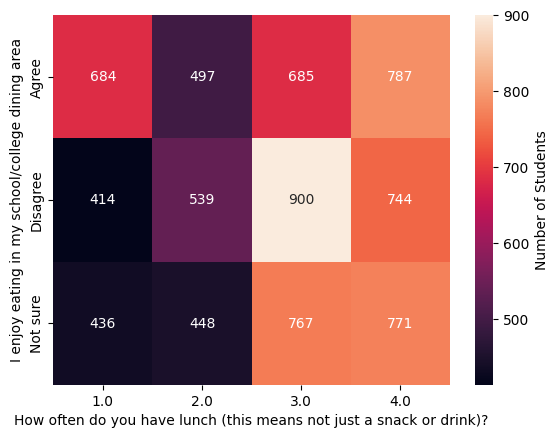

In [118]:
fig, ax = plt.subplots()
sns.heatmap(
    tmp2,
    annot=True,
    fmt=".0f",  # Ensure the annotations are integers
    cbar_kws={"label": "Number of Students"}
)
ax.set_ylabel(col1[1])
ax.set_xlabel("How often do you have lunch (this means not just a snack or drink)?")

Of the students who get 4 or more lunches per week, most say they enjoy eating in the dining area. However, of the students that get a proper lunch fewer than 4 days per week, the number of students who say they don't enjoy eating in the dining area is higher than those who say they are not sure or agree.

We want to know which columns affect whether a student enjoys eating in their school dining area. In other words, of the students who do not enjoy eating in the dining area what other opinions do they commonly have about the dining area? One way to do this is by looking at heatmaps for each column to see, for example, the number of students who did not enjoy eating in the school dining area and also felt they did not enough time to eat lunch. Another way to do this is by training a model to predict whether a student enjoys eating in the dining area and looking for the most important features in the model.

For simplicity, we are going to train a simple logistic regression model to predict whether a student will enjoy eating in the dining area. Logistic regression models only work on numerical data so we need to convert the strings in `df_lunch` to numbers.

In [119]:
df_lunch_numeric = df_lunch.replace({"Agree": 1, "Not sure": 0, "Disagree": -1})

# Again drop 'header_1' to make the column names shorter
df_lunch_numeric.columns = df_lunch_numeric.columns.droplevel("header_1")

# Remove rows where the target variable is missing
df_lunch_numeric = df_lunch_numeric.loc[~df_lunch_numeric["I enjoy eating in my school/college dining area"].isna(), :].copy()

C:\Users\Guest01\AppData\Local\Temp\ipykernel_23392\4036847210.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Split the dataset into `X` and `y` and plot the distribution of `y`.

<Axes: xlabel='I enjoy eating in my school/college dining area', ylabel='count'>

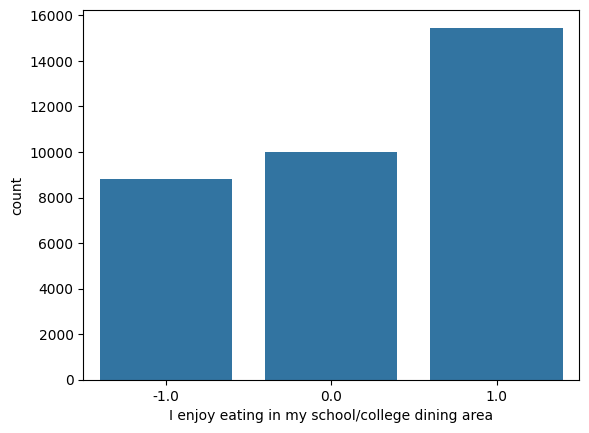

In [120]:
y_col = "I enjoy eating in my school/college dining area"
X = df_lunch_numeric.drop(columns=y_col)
y = df_lunch_numeric[y_col].copy()
sns.barplot(y.value_counts())

Most students have a value of 1 for *"I enjoy eating in my school/college dining area"*. In order to get a balanced data for our predictions, we will combine the -1 and 0 labels.

<Axes: xlabel='I enjoy eating in my school/college dining area', ylabel='count'>

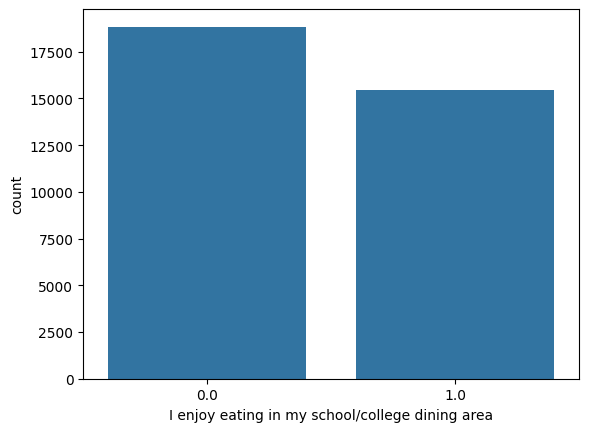

In [121]:
y = y.replace({-1.0: 0.0})
sns.barplot(y.value_counts())

Now we are ready to train our logistic regression model. We split our data in a training a test set. We train it on the training data and evaluate its performance on the test data which it has never seen before.

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.fillna(0.0), y)

model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = (y_train_pred == y_train).mean()
accuracy_test = (y_test_pred == y_test).mean()

print("Train accuracy: ", accuracy_train)
print("Test accuracy:  ", accuracy_test)

Train accuracy:  0.7064038259652397
Test accuracy:   0.702554531669194


The train and test accuracies are quite similar suggesting we are not overfitting the data. The model is better that just randomly selecting 0 and 1 (50%) but it is not amazing performance. However, the thing we are most interested in is the features that are most important in making these predictions.

We can get a sense of the most important features by looking at the models parameters with largest magnitudes. Visualise these magnitudes with a bar chart.

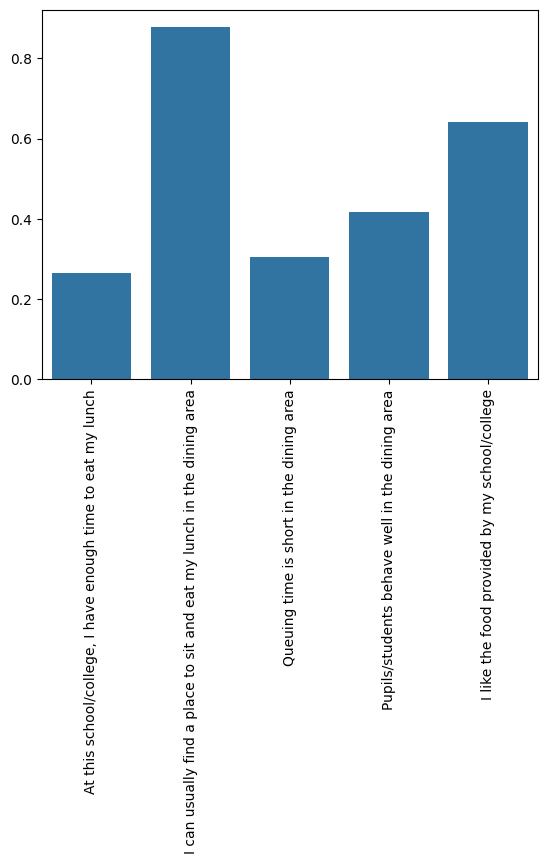

In [124]:
fig, ax = plt.subplots()
sns.barplot(x=X.columns.tolist(), y=model.coef_[0])
ax.tick_params(rotation=90, axis="x")

Having a place to sit is the most important feature in predicting enjoyment of eating lunch at school. Let us find the number of people who say they don't enjoy eating lunch at school and also cannot find a place to sit.

Text(0.5, 80.7222222222222, 'I can usually find a place to sit and eat my lunch\nin the dining area')

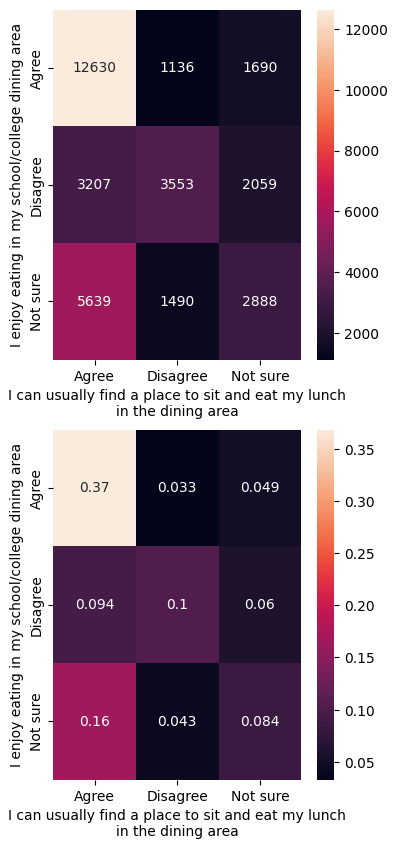

In [125]:
columns = [
    "I enjoy eating in my school/college dining area",
    "I can usually find a place to sit and eat my lunch in the dining area",
]

tmp = (
    df_lunch.droplevel("header_1", axis=1)[columns]
    .value_counts()
    .reset_index(name="Count")
    .pivot(
        index=columns[0],
        columns=columns[1],
        values="Count"
    )
)
fig, ax = plt.subplots(2, 1, figsize=(4, 10))
sns.heatmap(tmp, annot=True, fmt=".0f", ax=ax[0])
sns.heatmap(tmp / tmp.sum().sum(), annot=True, ax=ax[1])

ax[0].set_xlabel(textwrap.fill(columns[1], width=50))
ax[1].set_xlabel(textwrap.fill(columns[1], width=50))

Approximately 40% of students who said they enjoy eating in the dining area also said they could usually find a place to sit.

# 4 Quick Starting Points for Further Analysis

This section covers some areas where you may want to start your analysis. We encourage you to find something that you want to explore but this section may give a starting point.

Find the proportion of missing values in each column.

In [19]:
years = df.xs("No Group", axis=1, level="header_1")["questionnaire_login_year_group_name"]
years

0        Year 4
1        Year 4
2        Year 4
3        Year 3
4        Year 4
          ...  
41238    Year 6
41239    Year 6
41240    Year 6
41241    Year 6
41242    Year 6
Name: questionnaire_login_year_group_name, Length: 41243, dtype: object

In [95]:
feel = df.xs("How often do you feel the following?", axis=1, level="header_1")
feel

header_2,Stressed or anxious,Confident,Bad tempered,Angry,Happy,Upset,Sad,Lonely,Scared,Calm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
41238,Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Some days (2-3 days a week),Some days (2-3 days a week),Some days (2-3 days a week)
41239,Some days (2-3 days a week),Rarely/Never (0-1 day a week),Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Some days (2-3 days a week),Some days (2-3 days a week),Every day/Most Days (4-7 days a week),Every day/Most Days (4-7 days a week),Some days (2-3 days a week)
41240,Rarely/Never (0-1 day a week),Some days (2-3 days a week),Rarely/Never (0-1 day a week),Rarely/Never (0-1 day a week),Every day/Most Days (4-7 days a week),Rarely/Never (0-1 day a week),Some days (2-3 days a week),Rarely/Never (0-1 day a week),Some days (2-3 days a week),Some days (2-3 days a week)
41241,Rarely/Never (0-1 day a week),Some days (2-3 days a week),Rarely/Never (0-1 day a week),Some days (2-3 days a week),Every day/Most Days (4-7 days a week),Rarely/Never (0-1 day a week),Rarely/Never (0-1 day a week),Rarely/Never (0-1 day a week),Rarely/Never (0-1 day a week),Every day/Most Days (4-7 days a week)


In [96]:
feel["Year Group"] = years.copy()
rows = feel["Happy"].isna()
dfg = df[~rows]
dfg

C:\Users\Guest01\AppData\Local\Temp\ipykernel_23296\960539985.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



header_1  No Group                             \
header_2 hashed_id school_classification_list   
27         'b94e5'                    Primary   
28         '1a6a8'                    Primary   
29         'ef5ed'                    Primary   
30         '1b1f1'                    Primary   
31         '503d7'                  Secondary   
...            ...                        ...   
41238      'c9f7e'                    Primary   
41239      '57fa4'                    Primary   
41240      '89e5f'                    Primary   
41241      '13d4d'                    Primary   
41242      '2637a'                    Primary   

header_1                                               \
header_2 school_local_authority_filter_classification   
27                                              Leeds   
28                                              Leeds   
29                                              Leeds   
30                                              Leeds   
31                                              Leeds   
...                                               ...   
41238                                        National   
41239                                        National   
41240                                        National   
41241                                        National   
41242                                        National   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
27                                    Year 6           Boy / Male   
28                                    Year 6        Girl / Female   
29                                    Year 6           Boy / Male   
30                                    Year 6           Boy / Male   
31                                    Year 9           Boy / Male   
...                                      ...                  ...   
41238                                 Year 6        Girl / Female   
41239                                 Year 6           Boy / Male   
41240                                 Year 6           Boy / Male   
41241                                 Year 6        Girl / Female   
41242                                 Year 6           Boy / Male   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
27                                                      NaN                     
28                                                      NaN                     
29                                                      NaN                     
30                                                      NaN                     
31                                                      NaN                     
...                                                     ...                     
41238                                                   NaN                     
41239                                                   NaN                     
41240                                                   NaN                     
41241                                                   NaN                     
41242                                                   NaN                     

header_1                                               \
header_2 How would you describe your sexual identity?   
27                                                NaN   
28                                                NaN   
29                                                NaN   
30                                                NaN   
31                                       Heterosexual   
...                                               ...   
41238                                             NaN   
41239                                             NaN   
41240                                             NaN   
41241                                    

In [21]:
dfgd = dfg.drop(columns=dfg.columns[dfg.isna().all()])
dfgd
#dfgd.loc[(dfgd.loc["unique"]==1 and dfgd.loc["top"]==True)]

header_1  No Group                             \
header_2 hashed_id school_classification_list   
27         'b94e5'                    Primary   
28         '1a6a8'                    Primary   
29         'ef5ed'                    Primary   
30         '1b1f1'                    Primary   
31         '503d7'                  Secondary   
...            ...                        ...   
41238      'c9f7e'                    Primary   
41239      '57fa4'                    Primary   
41240      '89e5f'                    Primary   
41241      '13d4d'                    Primary   
41242      '2637a'                    Primary   

header_1                                               \
header_2 school_local_authority_filter_classification   
27                                              Leeds   
28                                              Leeds   
29                                              Leeds   
30                                              Leeds   
31                                              Leeds   
...                                               ...   
41238                                        National   
41239                                        National   
41240                                        National   
41241                                        National   
41242                                        National   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
27                                    Year 6           Boy / Male   
28                                    Year 6        Girl / Female   
29                                    Year 6           Boy / Male   
30                                    Year 6           Boy / Male   
31                                    Year 9           Boy / Male   
...                                      ...                  ...   
41238                                 Year 6        Girl / Female   
41239                                 Year 6           Boy / Male   
41240                                 Year 6           Boy / Male   
41241                                 Year 6        Girl / Female   
41242                                 Year 6           Boy / Male   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
27                                                      NaN                     
28                                                      NaN                     
29                                                      NaN                     
30                                                      NaN                     
31                                                      NaN                     
...                                                     ...                     
41238                                                   NaN                     
41239                                                   NaN                     
41240                                                   NaN                     
41241                                                   NaN                     
41242                                                   NaN                     

header_1                                               \
header_2 How would you describe your sexual identity?   
27                                                NaN   
28                                                NaN   
29                                                NaN   
30                                                NaN   
31                                       Heterosexual   
...                                               ...   
41238                                             NaN   
41239                                             NaN   
41240                                             NaN   
41241                                    

In [101]:
dfgd["How often do you feel the following?"].describe()

header_2,Stressed or anxious,Confident,Bad tempered,Angry,Happy,Upset,Sad,Lonely,Scared,Calm
count,34288,34288,34288,34288,34288,34288,34288,34288,34288,34288
unique,3,3,3,3,3,3,3,3,3,3
top,Rarely/Never (0-1 day a week),Some days (2-3 days a week),Rarely/Never (0-1 day a week),Rarely/Never (0-1 day a week),Every day/Most Days (4-7 days a week),Rarely/Never (0-1 day a week),Some days (2-3 days a week),Rarely/Never (0-1 day a week),Rarely/Never (0-1 day a week),Every day/Most Days (4-7 days a week)
freq,12636,14910,14997,14282,22075,15976,15679,21568,23742,16318


In [111]:
gender = dfgd.xs("What is your gender?", axis=1, level=1)
gcs = gender.value_counts()
gcs
#px.bar(gcs, x="No Group", y="count")

No Group                                    
Boy / Male                                      17046
Girl / Female                                   16121
I would prefer not to say                         560
I would describe my gender in some other way      328
Non-Binary                                        209
Gender fluid                                       12
Demi boy                                            7
Trans male                                          4
Trans female                                        1
Name: count, dtype: int64

In [22]:
import plotly.express as px
good_feel = feel[~rows]
good_feel.describe()

header_2,Stressed or anxious,Confident,Bad tempered,Angry,Happy,Upset,Sad,Lonely,Scared,Calm,Year Group
count,34288,34288,34288,34288,34288,34288,34288,34288,34288,34288,34288
unique,3,3,3,3,3,3,3,3,3,3,9
top,Rarely/Never (0-1 day a week),Some days (2-3 days a week),Rarely/Never (0-1 day a week),Rarely/Never (0-1 day a week),Every day/Most Days (4-7 days a week),Rarely/Never (0-1 day a week),Some days (2-3 days a week),Rarely/Never (0-1 day a week),Rarely/Never (0-1 day a week),Every day/Most Days (4-7 days a week),Year 6
freq,12636,14910,14997,14282,22075,15976,15679,21568,23742,16318,8263


In [23]:
gf = good_feel.drop(columns=["Year Group", "Bad tempered", "Angry", "Upset", "Scared"])
weights = {"Stressed or anxious": -1, "Confident": 1, "Happy": 1, "Sad": -1, "Lonely": -0.5, "Calm": 0.5}

In [116]:
gf = gf.replace({"Rarely/Never (0-1 day a week)": 0, "Some days (2-3 days a week)": 1, "Every day/Most Days (4-7 days a week)": 2})
gfw = pd.DataFrame()
for w, v in weights.items():
    gfw[w] = gf[w] * v

gfw["wellbeing"] = np.floor(gfw.sum(axis=1))
gfw.reset_index().drop("index", axis=1)

,Stressed or anxious,Confident,Happy,Sad,Lonely,Calm,wellbeing
0,-1,1,1,0,-0.5,0.5,1.0
1,0,1,2,0,-0.0,0.5,3.0
2,0,0,2,-1,-1.0,1.0,1.0
3,-1,1,2,0,-0.0,0.5,2.0
4,-1,1,1,-1,-0.5,0.5,0.0
...,...,...,...,...,...,...,...
34283,-2,2,2,-2,-0.5,0.5,0.0
34284,-1,0,2,-1,-1.0,0.5,-1.0
34285,0,1,2,-1,-0.0,0.5,2.0
34286,0,1,2,0,-0.0,1.0,4.0


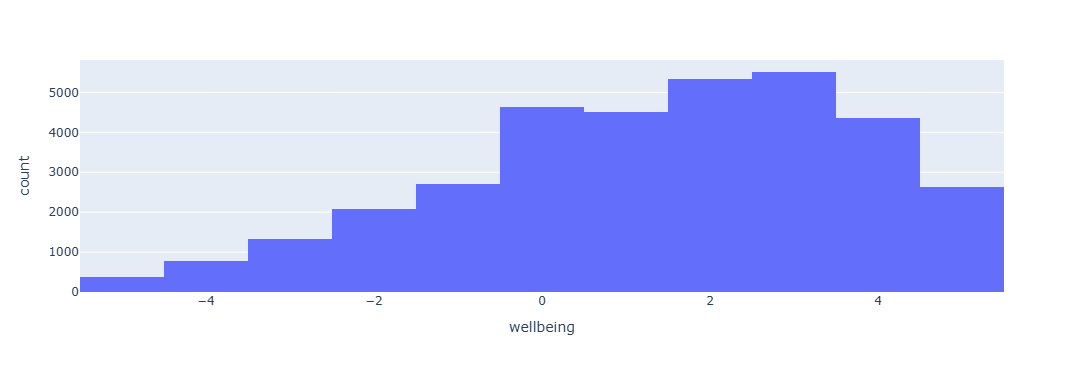

In [117]:
px.histogram(gfw, x="wellbeing")

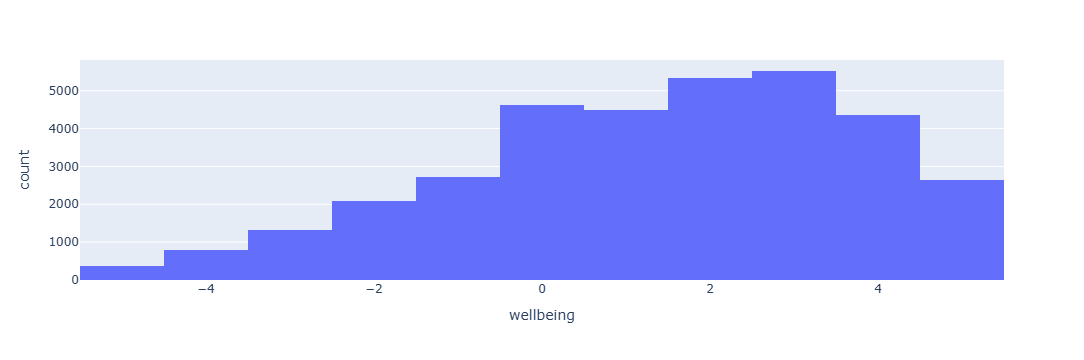

In [118]:
px.histogram(gfw, x="wellbeing")

In [46]:
gfw.to_csv("wellbeing_2.csv")

In [69]:
dfgd.xs("Have you ever tried to end your life?" , axis=1, level=1).value_counts()

If you have been bullied in or around school/college in the last 12 months, do you think it was because of any of the following?
No                                                                                                                                  5066
Yes, but longer ago than a year                                                                                                     1202
Yes, this year                                                                                                                       684
Yes, this month                                                                                                                      408
Name: count, dtype: int64

In [93]:
dfgd.xs("Would you know what to do if you or a friend was bullied?" , axis=1, level=1).value_counts()

If you have been bullied in or around school/college in the last 12 months, do you think it was because of any of the following?
Yes                                                                                                                                 30182
No                                                                                                                                   4018
Name: count, dtype: int64

In [94]:
dfgd.to_csv("dfgd.csv")

In [54]:
dfgd.xs("How much do you agree or disagree with the following statement 'I enjoy my life'?" , axis=1, level=1).describe()

header_1,How well do you think you cope with feeling the following?
count,34263
unique,3
top,Agree
freq,21550


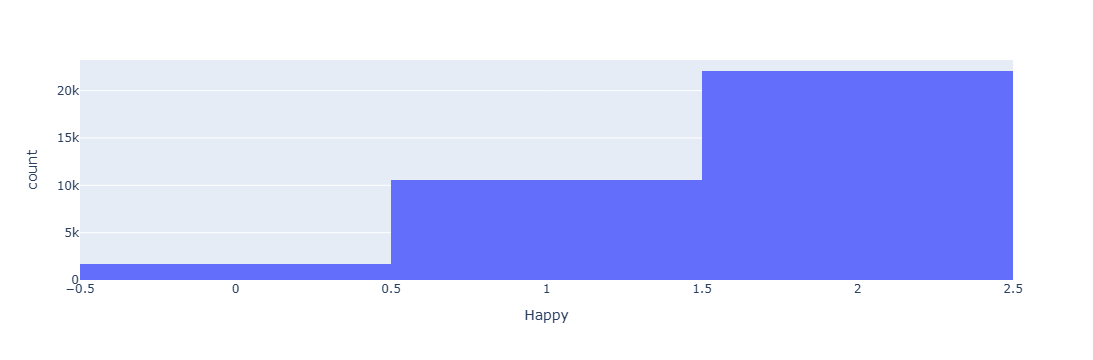

In [170]:
px.histogram(gfw, x="Happy")

In [164]:
gfw.to_csv("wellbeing.csv")

In [168]:
dfgd["Wellbeing Score"] = gfw["wellbeing"].copy()
dfgd

header_1  No Group                             \
header_2 hashed_id school_classification_list   
27         'b94e5'                    Primary   
28         '1a6a8'                    Primary   
29         'ef5ed'                    Primary   
30         '1b1f1'                    Primary   
31         '503d7'                  Secondary   
...            ...                        ...   
41238      'c9f7e'                    Primary   
41239      '57fa4'                    Primary   
41240      '89e5f'                    Primary   
41241      '13d4d'                    Primary   
41242      '2637a'                    Primary   

header_1                                               \
header_2 school_local_authority_filter_classification   
27                                              Leeds   
28                                              Leeds   
29                                              Leeds   
30                                              Leeds   
31                                              Leeds   
...                                               ...   
41238                                        National   
41239                                        National   
41240                                        National   
41241                                        National   
41242                                        National   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
27                                    Year 6           Boy / Male   
28                                    Year 6        Girl / Female   
29                                    Year 6           Boy / Male   
30                                    Year 6           Boy / Male   
31                                    Year 9           Boy / Male   
...                                      ...                  ...   
41238                                 Year 6        Girl / Female   
41239                                 Year 6           Boy / Male   
41240                                 Year 6           Boy / Male   
41241                                 Year 6        Girl / Female   
41242                                 Year 6           Boy / Male   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
27                                                      NaN                     
28                                                      NaN                     
29                                                      NaN                     
30                                                      NaN                     
31                                                      NaN                     
...                                                     ...                     
41238                                                   NaN                     
41239                                                   NaN                     
41240                                                   NaN                     
41241                                                   NaN                     
41242                                                   NaN                     

header_1                                               \
header_2 How would you describe your sexual identity?   
27                                                NaN   
28                                                NaN   
29                                                NaN   
30                                                NaN   
31                                       Heterosexual   
...                                               ...   
41238                                             NaN   
41239                                             NaN   
41240                                             NaN   
41241                                    

In [150]:
for i in gft:
    x = gft[i]
    score = 5
    for w, v in weights.items():
        score += x[w] * v
    print(x, score)
    break

header_2
Stressed or anxious    1
Confident              1
Happy                  1
Sad                    0
Lonely                 1
Calm                   1
Name: 27, dtype: int64 6.0


In [151]:
for i in gft:
    x = gft[i]
    score = 5
    for w, v in weights.items():
        score += x[w] * v
    gft.loc[len(gft), i] = score

gft

KeyboardInterrupt: 

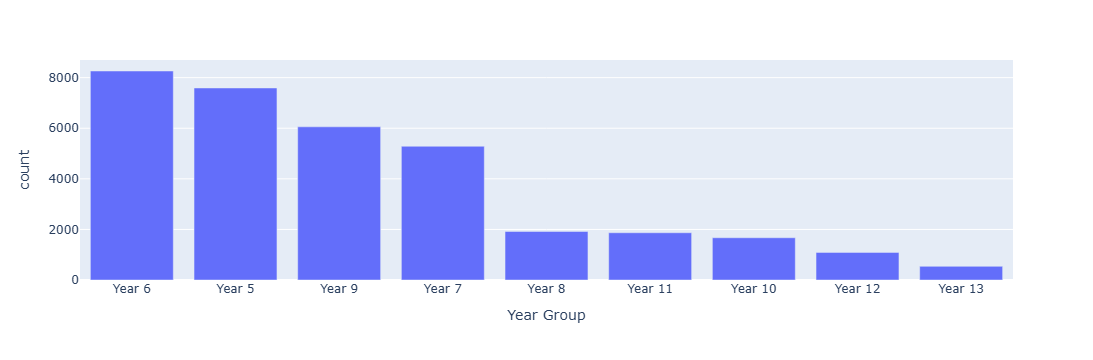

In [ ]:
year_counts = good_feel["Year Group"].value_counts().reset_index()
px.bar(year_counts, x="Year Group", y="count")

C:\Users\Guest01\AppData\Local\Temp\ipykernel_25468\3160821291.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



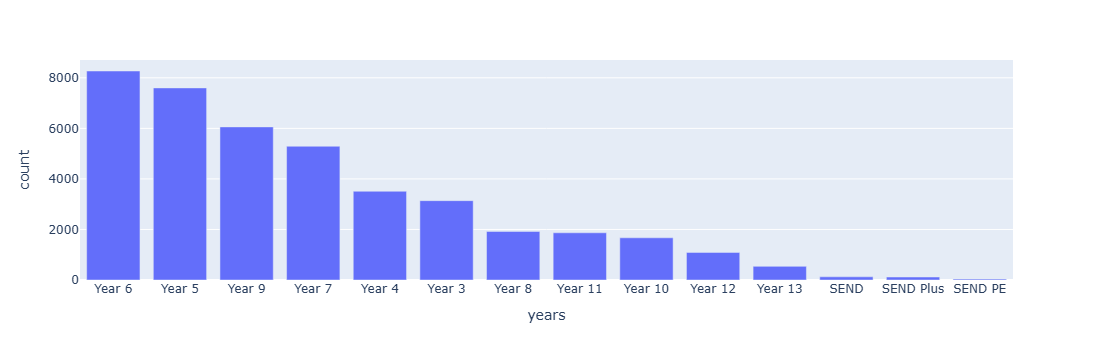

In [101]:
year_counts_df = df[("No Group", "questionnaire_login_year_group_name")].value_counts().reset_index()
year_counts_df["years"] = year_counts_df[('No Group', 'questionnaire_login_year_group_name')]
#year_counts.columns
px.bar(year_counts_df, x="years", y="count")

In [61]:
for i in feel.columns:
    print(feel[i].value_counts())

Stressed or anxious
Rarely/Never (0-1 day a week)            12636
Some days (2-3 days a week)              12586
Every day/Most Days (4-7 days a week)     9066
Name: count, dtype: int64
Confident
Some days (2-3 days a week)              14910
Every day/Most Days (4-7 days a week)    12763
Rarely/Never (0-1 day a week)             6615
Name: count, dtype: int64
Bad tempered
Rarely/Never (0-1 day a week)            14997
Some days (2-3 days a week)              12819
Every day/Most Days (4-7 days a week)     6472
Name: count, dtype: int64
Angry
Rarely/Never (0-1 day a week)            14282
Some days (2-3 days a week)              13980
Every day/Most Days (4-7 days a week)     6026
Name: count, dtype: int64
Happy
Every day/Most Days (4-7 days a week)    22075
Some days (2-3 days a week)              10530
Rarely/Never (0-1 day a week)             1683
Name: count, dtype: int64
Upset
Rarely/Never (0-1 day a week)            15976
Some days (2-3 days a week)              13854
Every day/

In [62]:
# cig = df.xs("Have you ever used substances known as 'New Psychoactive Substances'? (These used to be known as legal highs, but are now illegal)" , axis=1, level="header_2")
cig_list = [col for col in df.columns.get_level_values(1) if 'substances' in col]
cig_list

df.xs('Which year group were you in when you first had sex (sexual contact between individuals involving penetration)?', axis=1, level=1).value_counts()

KeyError: 'Which year group were you in when you first had sex (sexual contact between individuals involving penetration)?'

In [11]:
df.head()

header_1  No Group                             \
header_2 hashed_id school_classification_list   
0           '60c9'                    Primary   
1          '65c90'                    Primary   
2          'b530a'                    Primary   
3          'b7e74'                    Primary   
4          'e8a80'                    Primary   

header_1                                               \
header_2 school_local_authority_filter_classification   
0                                               Leeds   
1                                               Leeds   
2                                               Leeds   
3                                               Leeds   
4                                               Leeds   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
0                                     Year 4           Boy / Male   
1                                     Year 4           Boy / Male   
2                                     Year 4        Girl / Female   
3                                     Year 3           Boy / Male   
4                                     Year 4        Girl / Female   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
0                                                       NaN                     
1                                                       NaN                     
2                                                       NaN                     
3                                                       NaN                     
4                                                       NaN                     

header_1                                               \
header_2 How would you describe your sexual identity?   
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   

header_1                                \
header_2 Which of these describes you?   
0                                White   
1                                White   
2                                White   
3                                White   
4                                White   

header_1                                           \
header_2 Do you consider yourself to be disabled?   
0                                              No   
1                                              No   
2                                              No   
3                                              No   
4                                              No   

header_1                                                                                                \
header_2 If you said yes, you consider yourself to be disabled, what is the nature of your impairment?   
0                                                       NaN                                              
1                                                       NaN                                              
2                                                       NaN                                              
3                                                       NaN                                              
4                                                       NaN                                              

header_1  ...                     After lockdown...  \
header_2  ... Are you able to concentrate in class?   
0         ...                                   NaN   
1         ...                                   NaN   
2         ...                                   NaN   
3         ...                                   NaN   
4         ...                                   NaN   

header_1

Text(0, 0.5, 'Proportion of Missing Values')

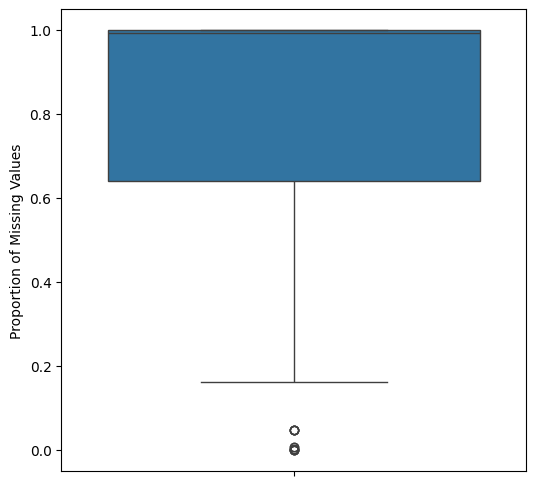

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.boxplot(df.isna().mean(axis=0))
ax.set_ylabel("Proportion of Missing Values")

In [6]:
empty_cells = df.isna()
empt_desc = df.isna()
empt_desc.drop(columns=empt_desc.columns[empt_desc.nunique()==1], inplace=True)
empt_desc.describe()

,Unnamed: 1_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 15_level_0,...,Unnamed: 754_level_0,Unnamed: 755_level_0,Unnamed: 756_level_0,Unnamed: 757_level_0,Unnamed: 758_level_0,Unnamed: 759_level_0,Unnamed: 760_level_0,Unnamed: 761_level_0,Unnamed: 762_level_0,Unnamed: 763_level_0
,school_classification_list,Is your gender identity the same gender you were assigned at birth?,How would you describe your sexual identity?,Which of these describes you?,Do you consider yourself to be disabled?,"If you said yes, you consider yourself to be disabled, what is the nature of your impairment?",Where do you live most of the time?,Do you have a free school meal?,Which of these describes you as a student?,"In a normal school/college week, how many days do you have breakfast?",...,Have you learned anything about different kinds of sexual orientation?,Have you learnt anything about how babies are made and born? (e.g. through lessons at school/college),Have you learnt anything about using contraception? (e.g. through lessons at school/college),"Have you learnt anything about avoiding Sexual Transmitted Infections (eg. Chlamydia), HIV, AIDS? (e.g. through lessons at school/college)",Have you learnt anything about Homophobic/Biphobic/Transphobic bullying and ways to stop it? (e.g. through lessons at school/college),Have you learnt anything about domestic violence and abusive relationships? (e.g. through lessons at school/college),Have you learned anything about peer-on-peer abuse?,"If anybody sent you hurtful messages, pictures or videos on the internet or on your mobile phone, would you know who to tell?",If you ever felt unsafe would you know where to go for help?,"Do you find your Personal, Social, Health and Economic (PSHE) education lessons useful?"
count,41243,41243,41243,41243,41243,41243,41243,41243,41243,41243,...,41243,41243,41243,41243,41243,41243,41243,41243,41243,41243
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,True,True,False,False,True,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
freq,41146,39613,22815,40924,40905,38828,41179,39291,39611,28806,...,41001,41000,41125,41125,41125,41125,41000,41000,41000,41000


In [ ]:
col0 = empt_desc.columns[0]

empt_desc.drop(col0, axis=1)
empt_desc

header_1  No Group                             \
header_2 hashed_id school_classification_list   
count        41243                      41243   
unique           1                          2   
top          False                      False   
freq         41243                      41146   

header_1                                               \
header_2 school_local_authority_filter_classification   
count                                           41243   
unique                                              1   
top                                             False   
freq                                            41243   

header_1                                                           \
header_2 questionnaire_login_year_group_name What is your gender?   
count                                  41243                41243   
unique                                     1                    1   
top                                    False                False   
freq                                   41243                41243   

header_1                                                                       \
header_2 Is your gender identity the same gender you were assigned at birth?    
count                                                 41243                     
unique                                                    2                     
top                                                    True                     
freq                                                  39613                     

header_1                                               \
header_2 How would you describe your sexual identity?   
count                                           41243   
unique                                              2   
top                                              True   
freq                                            22815   

header_1                                \
header_2 Which of these describes you?   
count                            41243   
unique                               2   
top                              False   
freq                             40924   

header_1                                           \
header_2 Do you consider yourself to be disabled?   
count                                       41243   
unique                                          2   
top                                         False   
freq                                        40905   

header_1                                                                                                \
header_2 If you said yes, you consider yourself to be disabled, what is the nature of your impairment?   
count                                                 41243                                              
unique                                                    2                                              
top                                                    True                                              
freq                                                  38828                                              

header_1  ...                     After lockdown...  \
header_2  ... Are you able to concentrate in class?   
count     ...                                 41243   
unique    ...                                     1   
top       ...                                  True   
freq      ...                                 41243   

header_1                                                                                                                                             \
header_2 After lockdown, if you needed it, have you been able to get support from school/college to help you with your emotional and mental health?   
count                                                 41243                                                                                           
unique                                                    1                                                                 

In [171]:
col1 = empt_desc.columns[1]
num = empt_desc.loc["unique", col1]
num.iloc[0], type(num.iloc[0])

C:\Users\Guest01\AppData\Local\Temp\ipykernel_23392\2296154820.py:2: PerformanceWarning:

indexing past lexsort depth may impact performance.



(2, int)

In [1]:
for i in empt_desc.columns:
    if empt_desc.loc["unique", i].iloc[0] == 1:
        print(i)
        empt_desc.drop(i, axis=1)

empt_desc
    

NameError: name 'empt_desc' is not defined

There are a lot of columns where the data is completely missing:

* Are there certain topics for which the data is always missing?
* Are there patterns to when we find missing data? For example are certain questions only asked to certain age groups? 
* Is there less missing data in previous years?

Find the number of times students get 30 minutes of physical activity per week.

In [ ]:
header_1 = "In the last four weeks, not through school/college, which of the following activities have you done?"
col1 = "Taken part in organised sports/dance (e.g. football, rugby, cricket, dance, Zumba, gymnastics, cycling, martial arts)"
col2 = "In a normal week how many times are you physically active for 30 minutes or more?"

tmp = (
    df.droplevel("header_1", axis=1)[[col1, col2]]
    .replace({"14 or more": 15, "0 (Never)": 0})
    .dropna()
    .value_counts()
    .reset_index(name="Count")
    .rename(columns={col1: "Taken part in organised sports/dance"})
)
tmp[col2] = tmp[col2].astype("int")

fig, ax = plt.subplots()
sns.barplot(
    tmp,
    x=col2,
    y="Count",
    hue="Taken part in organised sports/dance"
)
ax.set_xlabel(textwrap.fill(col2, width=50))
ax.set_ylabel("Number of students")

Students who have taken in organised sports or dance tend to be more physically active.

* Why might a student not take part in organised sport/dance?
* What barriers might affect a student getting involed in organised sport or dance?
* Has the amount of physical acticity that students are getting increased or decreased over the last few years?

In [ ]:
header_1 = "How often do you feel the following?"
header_2 = "Stressed or anxious"
col1 = df.xs(header_1, axis=1, level="header_1")[header_2]

header_1 = "No Group"
header_2 = "questionnaire_login_year_group_name"
col2 = df.xs(header_1, axis=1, level="header_1")[header_2]

tmp = pd.DataFrame([col1, col2]).transpose()

col1 = "questionnaire_login_year_group_name"
col2 = "Stressed or anxious"
tmp = (
    tmp.groupby(col1)
    .value_counts(normalize=True)
    .reset_index(name="Count")
    .replace({
        "Rarely/Never (0-1 day a week)": "0-1 day a week",
        "Some days (2-3 days a week)": "2-3 days a week",
        "Every day/Most Days (4-7 days a week)": "4-7 days a week"
    })
)
tmp[col1] = tmp[col1].str.split(" ").str[-1].astype("int")

fig, ax = plt.subplots()
sns.barplot(tmp, x="questionnaire_login_year_group_name", y="Count", hue="Stressed or anxious")
ax.set_xlabel("Year Group")
ax.set_ylabel("Proportion of Students")
ax.legend(
    title="How often do you feel stressed or anxious?",
    bbox_to_anchor=(1.05, 1.05)
)

Students in higher year groups report they feel stressed or anxious much more often than students in lower year groups.

* Are there years when students feel more or less stressed?
* Are there any common traits amongst students who say they do not feel regularly?